<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/ml02_knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 모듈 import

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# scikit-lean(sklearn) 패키지(모듈)의 neighbors 서브 모듈에 정의된 KNeigborsClassifier 클래스를 import
from sklearn.neighbors import KNeighborsClassifier

# 데이터 준비

생선의 품종(어종)과 생선의 특성들(무게, 길이, 대각선 길이, 높이, 너비) 데이터 셋

In [12]:
# 파일이 저장된 Github 주소
fish_scv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [15]:
# CSV 파일을 읽고 DataFrame을 생성
fish = pd.read_csv(fish_scv)

In [16]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# 데이터 탐색

EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

In [18]:
# 숫자 타입 변수(DF-colum)들의 기술 통계량
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [20]:
# 카테고리 타입 변수의 빈도수 
species_cnt = fish['Species'].value_counts()
species_cnt

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

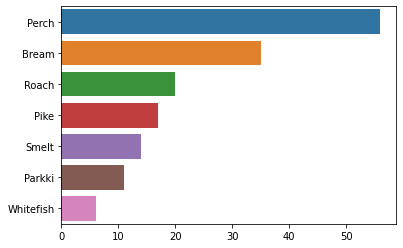

In [21]:
sns.barplot(x=species_cnt.values, y=species_cnt.index)
plt.show()

숫자 타입 변수들의 히스토그램

5개의 subplot을 생성하고, 각각의 변수들의 히스토그램을 그림.

In [35]:
weight_count = fish['Weight'].value_counts()

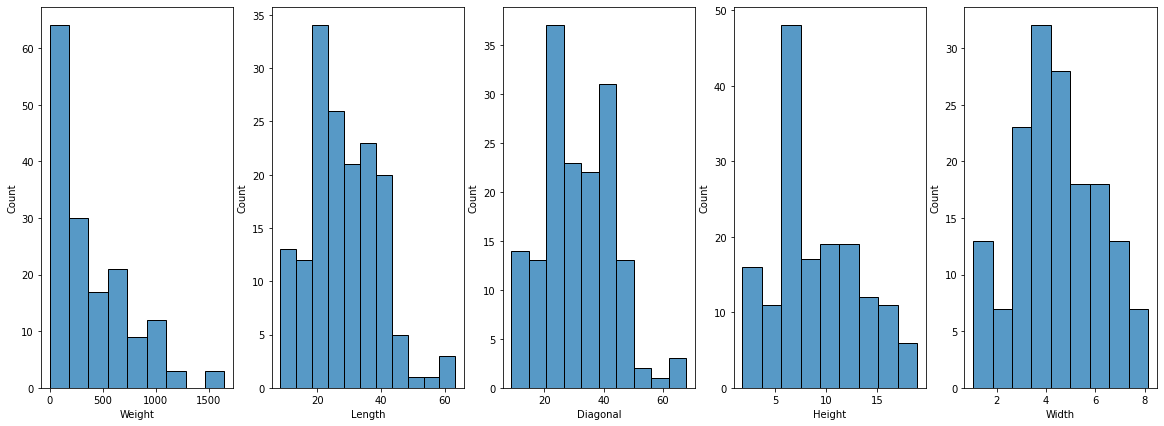

In [41]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 7))

variables = fish.columns[1:] # 1번부터 끝까지 Weight, ... Width 컬럼 이름들의 배열
for i, var in enumerate(variables): # enumerate-> 배열에 있는 index, value를 같이 꺼내줌
    sns.histplot(x=var, data=fish, ax=ax[i])
    # print(i, var)


plt.show()